# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
original_output_df = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

646

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [37]:
# WEATHER_API URL: http://api.openweathermap.org/data/2.5/weather?appid=fc77fb30aacf15de2e57f6ad2f7b9786&units=metric&q=
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


#Lists for holding weather data
temp = []
humidity = []
max_temp = []
cloudiness = []
windspeed = []
country = []
date = []
city2 = []

#Lat (y) | Long (x) 
lat = []
lng = []

#for loop numbers for Record number and Set numbers
number = 1 
set_num = 1

#Loop through cities for weather data
for city in cities[:500]:
    weather_url = f"{url}appid={weather_api_key}&units={units}&q=" + city
    weather_response = requests.get(weather_url)
    weather_json = weather_response.json()

    try:
        temp.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        max_temp.append(weather_json['main']['temp_max'])
        cloudiness.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        city2.append(city)

            

        print(f"Processing Record {number} of Set of {set_num} | {city}")
        number = number + 1
        if number > 50:
            number = 0 
            set_num = set_num + 1 
            
    except:
        print("City not found. Skipping...")

Processing Record 1 of Set of 1 | namibe
Processing Record 2 of Set of 1 | bukachacha
Processing Record 3 of Set of 1 | marsabit
Processing Record 4 of Set of 1 | rikitea
Processing Record 5 of Set of 1 | wanaka
City not found. Skipping...
Processing Record 6 of Set of 1 | ushuaia
Processing Record 7 of Set of 1 | hofn
Processing Record 8 of Set of 1 | sistranda
Processing Record 9 of Set of 1 | barrow
Processing Record 10 of Set of 1 | cap malheureux
Processing Record 11 of Set of 1 | grindavik
Processing Record 12 of Set of 1 | jamestown
Processing Record 13 of Set of 1 | rundu
Processing Record 14 of Set of 1 | chulman
Processing Record 15 of Set of 1 | busselton
Processing Record 16 of Set of 1 | cape town
Processing Record 17 of Set of 1 | kruisfontein
Processing Record 18 of Set of 1 | trairi
Processing Record 19 of Set of 1 | punta arenas
Processing Record 20 of Set of 1 | port alfred
Processing Record 21 of Set of 1 | mogadishu
Processing Record 22 of Set of 1 | bredasdorp
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
# create dataframe
weather_dict = {"City": city2,
                "Lat": lat,
                "Lng": lng,
                "Max Temp": max_temp,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Windspeed": windspeed,
                "Country": country,
                "Date": date,
                }
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,namibe,-15.1961,12.1522,18.69,86,12,2.77,AO,1628546982
1,bukachacha,52.9833,116.9167,14.18,99,100,1.79,RU,1628546982
2,marsabit,2.3284,37.9899,20.70,53,77,9.88,KE,1628546983
3,rikitea,-23.1203,-134.9692,22.58,83,55,3.94,PF,1628546983
4,wanaka,-44.7000,169.1500,5.66,63,32,1.49,NZ,1628546983
...,...,...,...,...,...,...,...,...,...
136,pandan,14.0453,124.1694,26.18,85,100,2.49,PH,1628547077
137,mae hong son,19.3003,97.9685,23.43,99,100,0.53,TH,1628547077
138,saint-francois,46.4154,3.9054,15.10,94,0,0.00,FR,1628547078
139,kaitangata,-46.2817,169.8464,8.39,74,74,5.41,NZ,1628547078


In [49]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,1.410000e+02
mean,14.748374,15.710290,19.216667,72.836879,55.312057,4.015177,1.628547e+09
std,37.919138,93.944884,8.136233,19.829136,39.893095,2.855997,7.779205e+01
min,-54.800000,-175.200000,4.010000,9.000000,0.000000,0.000000,1.628547e+09
25%,-17.933300,-54.916700,12.170000,65.000000,12.000000,1.860000,1.628547e+09
50%,14.896100,16.588700,19.660000,78.000000,59.000000,3.220000,1.628547e+09
75%,48.649900,94.916700,26.180000,87.000000,97.000000,5.490000,1.628547e+09
max,78.218600,170.313300,40.260000,100.000000,100.000000,16.460000,1.628547e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

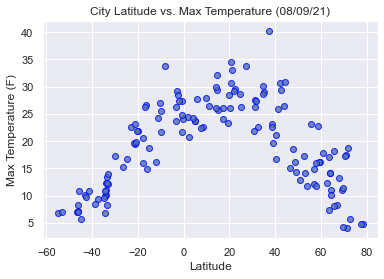

In [50]:
plt.scatter(weather_data["Lat"], 
            weather_data["Max Temp"],
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Temperature (F).png")

## Latitude vs. Humidity Plot

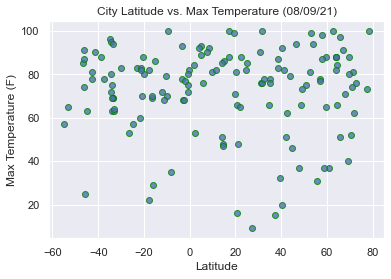

In [51]:
plt.scatter(weather_data["Lat"], 
            weather_data["Humidity"],
            edgecolor="green", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Temperature (F).png")

## Latitude vs. Cloudiness Plot

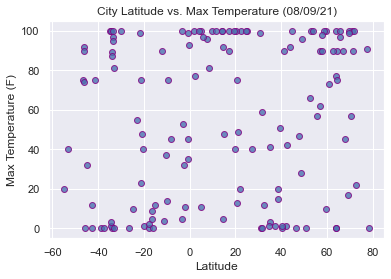

In [52]:
plt.scatter(weather_data["Lat"], 
            weather_data["Cloudiness"],
            edgecolor="purple", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Temperature (F).png")

## Latitude vs. Wind Speed Plot

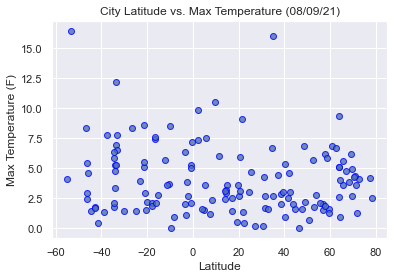

In [54]:
plt.scatter(weather_data["Lat"], 
            weather_data["Windspeed"],
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Temperature (F).png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [64]:
#Cities on the Equator will be included in the Southern Hemisphere data. 
northern_lat = weather_data[weather_data['Lat'] > 0]
southern_lat = weather_data[weather_data['Lat'] <= 0]

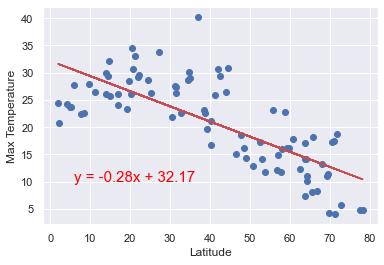

R-squared: 0.564666


In [69]:
x_values = northern_lat['Lat']
y_values = northern_lat['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

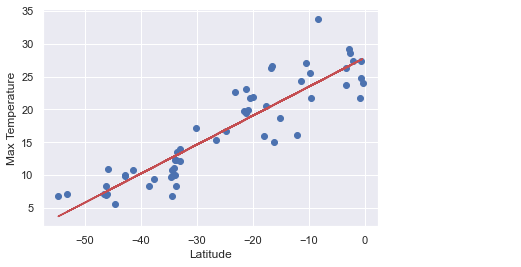

R-squared: 0.819575


In [70]:
x_values = southern_lat['Lat']
y_values = southern_lat['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

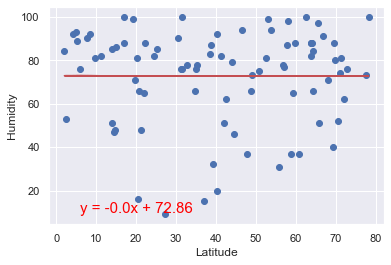

R-squared: 0.000006


In [71]:
x_values = northern_lat['Lat']
y_values = northern_lat['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

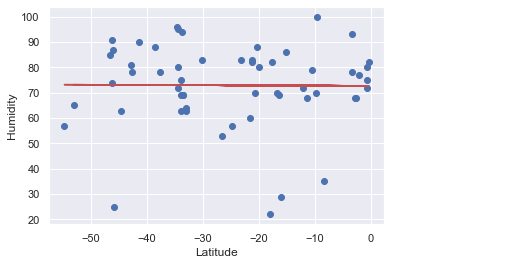

R-squared: 0.000067


In [72]:
x_values = southern_lat['Lat']
y_values = southern_lat['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

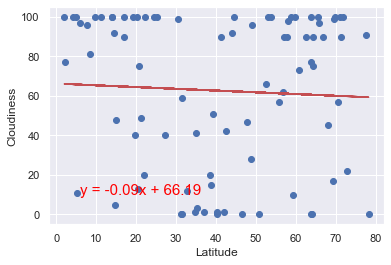

R-squared: 0.002494


In [73]:
x_values = northern_lat['Lat']
y_values = northern_lat['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

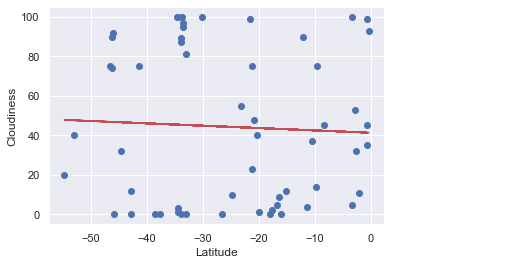

R-squared: 0.002244


In [74]:
x_values = southern_lat['Lat']
y_values = southern_lat['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

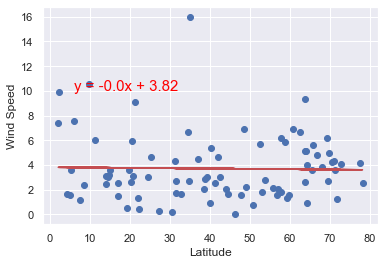

R-squared: 0.000468


In [75]:
x_values = northern_lat['Lat']
y_values = northern_lat['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

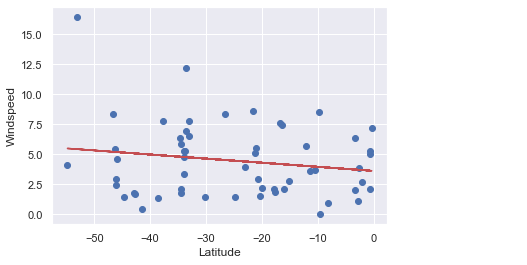

R-squared: 0.029296


In [76]:
x_values = southern_lat['Lat']
y_values = southern_lat['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")